Sample Data:
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1    

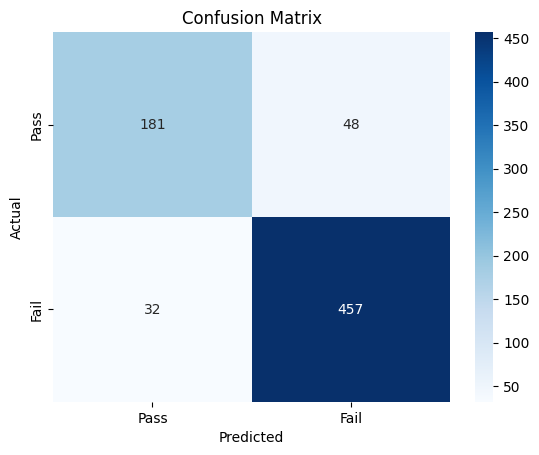

In [5]:
# Student Performance Prediction
# Name: [Your Name]
# Roll No: [Your Roll Number]

# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the dataset
data = pd.read_csv('/content/8. Student Performance Prediction.csv')

# Step 3: Display the first few rows
print("Sample Data:")
print(data.head())

# Step 4: Create Pass/Fail column based on GradeClass
# Assuming: GradeClass 1 & 2 => Pass, GradeClass 3 & 4 => Fail
data['Result'] = data['GradeClass'].apply(lambda x: 'Pass' if x <= 2 else 'Fail')

# Step 5: Select features and target
X = data[['StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']]
y = data['Result']

# Step 6: Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Step 7: Train the model
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

# Step 8: Predict the test data
y_pred = model.predict(X_test)

# Step 9: Print performance
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 10: Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['Pass', 'Fail'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pass', 'Fail'], yticklabels=['Pass', 'Fail'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
